## 0 METODOLOGIA CRISP-MD

## 1  Comprender el negocio
<p>Se nos hizo entrega como grupo un archivo excel con los registros de un grupo de clientes del banco llamado Monopoly, el cual contiene variada información y datos de los clientes de este. Este banco recientemente fue adquirido por un banco extranjero llamado "Dormammu", es por esta razon que se nos ha encargado como equipo en esta primera iteración realizar un analisis exploratorio a partir estos datos.
La empresa se dedica a la gestion y administracion de clientes bancarios manteniendo un registro de cada uno de ellos,desde los datos personales hasta su actividad bancaria,estos datos permiten un enfoque organizado para la base de datos de los clientes lo que facilita la clasificacion y analisis de cada uno de estos para conocer sus caracteristias demograficas,economicas,historial crediticio,Actividad bancaria,etc.</p>

> ## **2. Comprender los datos**
>
> **Características del Cliente**
>
> - **Adicional** → Indica si el cliente tiene productos adicionales.  
> - **Antigüedad** → Tiempo que el cliente lleva con la empresa.  
> - **CambioPin** → Registro de cambios de clave/PIN.  
> - **Consumo** → Monto consumido (ej. compras con tarjeta).  
> - **Débito** → Uso de tarjeta de débito.  
> - **Ctacte** → Si posee cuenta corriente.  
> - **Cuentas** → Número total de cuentas del cliente.  
> - **Hipotecario** → Si posee crédito hipotecario.  
> - **Internauta** → Uso de banca digital o internet.  
> - **Monoproducto** → Cliente con un único producto.  
> - **TC** → Indica si tiene tarjeta de crédito.  
> - **Dualidad** → Cliente con combinación de productos.  
>
> **Cupos de crédito**
>
> - **CUPO_L1** → Límite de crédito línea 1.  
> - **CUPO_MX** → Cupo máximo disponible.  
> - **CUPO_L2** → Límite de crédito línea 2.  
>
> **Colocaciones y estados de cuenta (últimos 12 meses)**
>
> - **Col_T12** → Colocaciones totales en 12 meses.  
> - **ColL1TE_T12** → Colocaciones en línea 1.  
> - **EeccInt_T12** → Estado de cuenta internacional.  
> - **EeccNac_T12** → Estado de cuenta nacional.  
>
> **Facturación (Fac = Facturas)**
>
> - **Fac_T12** → Facturación total últimos 12 meses.  
> - **FacAI_T12** → Facturación internacional.  
> - **FacAN_T12** → Facturación nacional.  
> - **FacCCOT_T12** → Facturación en cuotas.  
> - **FacCCPC_T12** → Facturación compras.  
> - **FacCI_T12** → Facturación internacional adicional.  
> - **FacCN_T12** → Facturación nacional adicional.  
> - **FacCOL_T12** → Facturación de colocaciones.  
> - **FacDebAtm_T12** → Facturación en retiros de cajero.  
> - **FacDebCom_T12** → Facturación en débitos de comercio.  
> - **FacPAT_T12** → Facturación en pagos automáticos.  
>
> **Flags de actividad (FlgAct)**
>
> - **FlgAct_T12** → Cliente activo últimos 12 meses.  
> - **FlgActAI_T12** → Activo en internacional.  
> - **FlgActAN_T12** → Activo en nacional.  
> - **FlgActCCOT_T12** → Activo en compras a cuotas.  
> - **FlgActCCPC_T12** → Activo en compras.  
> - **FlgActCI_T12** → Activo en internacional adicional.  
> - **FlgActCN_T12** → Activo en nacional adicional.  
> - **FlgActCOL_T12** → Activo en colocaciones.  
> - **FlgActPAT_T12** → Activo en pagos automáticos.  
>
> **Pagos**
>
> - **PagoInt_T12** → Pagos internacionales últimos 12 meses.  
> - **PagoNac_T12** → Pagos nacionales últimos 12 meses.  
>
> **Transacciones (Txs)**
>
> - **Txs_T12** → Transacciones totales en 12 meses.  
> - **TxsAI_T12** → Transacciones internacionales.  
> - **TxsAN_T12** → Transacciones nacionales.  
> - **TxsCCOT_T12** → Transacciones en cuotas.  
> - **TxsCCPC_T12** → Transacciones en compras.  
> - **TxsCI_T12** → Transacciones internacionales adicionales.  
> - **TxsCN_T12** → Transacciones nacionales adicionales.  
> - **TxsCOL_T12** → Transacciones de colocaciones.  
> - **TxsDebAtm_T12** → Retiros en cajeros.  
> - **TxsDebCom_T12** → Débitos de comercio.  
> - **TxsPAT_T12** → Pagos automáticos (PAT).  
>
> **Uso de líneas de crédito**
>
> - **UsoL1_T12** → Uso de línea 1.  
> - **UsoL2_T12** → Uso de línea 2.  
> - **UsoLI_T12** → Uso de línea internacional.  


##  Preparando el entorno de desarrollo

Librerias Necesarias

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
import plotly.express as px
import statistics 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




#read_file = pd.read_excel("Base_clientes_Monopoly-0.xlsx")  
r#ead_file.to_csv("BaseFinal.csv", index=False, header=True, encoding="utf-8")

In [5]:
df = pd.read_csv('Desktop/machin/BaseFinal.csv')

In [6]:
df.head(15)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Col_T12,ColL1TE_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,675198.0,675198.0,22000.0,0.0,702168.0,0.0,731768.0,25890.0,0.0,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,370529.0,82504.0,250000.0,0.0,244876.0,0.0,244876.0,284632.0,0.0,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,123950.0,0.0,29990.0,0.0,94415.0,0.0,94415.0,0.0,0.0,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,343226.0,315896.0,80000.0,0.0,358807.0,0.0,358807.0,14660.0,0.0,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,177973.0,0.0,236467.0,0.0,233331.0,0.0,67516.0,234211.0,0.0,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,130390.0,0.0,81894.0,0.0,81894.0,0.0,0.0,165188.0,0.0,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,567296.0,120079.0,480000.0,0.0,322145.0,0.0,393169.0,178385.0,0.0,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,0.0,19233.0,0.0,0.0,0.0,0.0,45270.0,0.0,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,472089.0,443880.0,60000.0,0.0,480265.0,0.0,480265.0,26191.0,0.0,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,0.0,3647615.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Se revisa las columnas que contiene nuestro DataFrame con el fin de conocer de mejor manera los datos

In [7]:
df.shape

(51124, 62)

Revisamos el tamaño del dataframe

## . Selección de variables a utilizar

Variables a utilizar (Edad,sexo,antiguedad,Cupo_MX)

In [8]:
df1= df.loc[:,'Id':'CUPO_MX']

In [9]:
df1

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,M,13.0,43,NaN,130,1,1,0,...,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,1,0,1,0,NaN,1,1,750000,150000.0,1000.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0,0,0,0,1.0,1,2,1570800,220001.0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,1,0,1,0,1.0,2,3,2762000,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,1,0,0,1,1.0,2,3,999000,1000.0,550.0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,1,0,0,1,1.0,1,1,1744200,1.0,300.0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,1,0,0,1,1.0,1,2,1061000,194700.0,1526.0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,1,0,0,0,NaN,1,1,1612000,300000.0,2300.0


Visualizamos la existencia de nulos dentro de cada columna, lo cual nos entrega que existen nulos en columnas como "Renta", "Region" y "CambioPin".

In [10]:
df1.isna().sum()

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
CUPO_L1             0
CUPO_L2             0
CUPO_MX             0
dtype: int64

A partir de las variables escogidas se decidio solo conservar las variables a  utilizar (Sexo,Antiguedad,Fac_T12,edad)

In [11]:
cols_impute = ['Region','Renta']
print(df1[cols_impute].isnull().sum())

Region       53
Renta     13365
dtype: int64


### Eliminación de nulos

A continuacion se procede a eliminar los nulos usando .drop con la opcion de axis=1 para eliminar columnas con nulos 

In [12]:
DFIni = df1.drop(['CambioPin'], axis=1)

### K-NN imputer

en el paso se utilizo la libreria KNNImputer para el llenado de datos nulos en las variables seleccionadas.

In [13]:

imputer = KNNImputer(n_neighbors=4, weights='distance')
DFIni[cols_impute] = imputer.fit_transform(DFIni[cols_impute])


In [14]:

print(DFIni[cols_impute].isnull().sum())

Region    0
Renta     0
dtype: int64


#### Relleno de nulos

Seguido de eso, reemplazamos los datos nulos en caso de quedar de 'Renta' y 'Region' por valores '0'.

En el caso de Renta los definimos como 0, ya que los clientes al dejar nulo se da a entender que no poseen renta.

En el caso de Region los definimos como 0, ya que las regiones vienen expresadas en numero y los nulos se da a entender que en su momento no registraron region de residencia.


In [15]:
DFIni['Renta'] = DFIni['Renta'].fillna(value=0)

In [16]:
DFIni['Region'] = DFIni['Region'].fillna(value=0)

Es por esto que el dataframe **"DFIni"** será el dataframe con el que trabajaremos esta primera entrega. Dentro de este, las variables con las que que llevaremos a cabo el estudio son las siguientes: <br/>
* Id = Identificador de cada cliente.<br/>
*  Subsegmento = Identificador de grupo de clientes correspondiente. <br/>
*  Sexo = Género registrado del cliente.  <br/>
*  Region = Región de residencia registrada por el cliente.<br/>
*  Edad = Edad registrada del cliente.<br/>
*  Renta = Renta que posee el cliente.<br/>
*  Antiguedad = Antiguedad en el banco del cliente en meses.<br/>
*  Internauta = Indicador de cliente que usa la web del banco. <br/>
*  Adicional = Indicador de tenencia de tarjetas de credito adicionales.<br/>
*  Dualidad = Indicador de dualidad con respecto a la posesion de 2 o más TC
<br/>
*  MonoProducto = Indicador de si el cliente posee solo 1 TC.<br/>
*  Ctate = Indicador de posesión de cuenta corriente.<br/>
*  Consumo = Indicador de Credito de Consumo.<br/>
*  Hipotecario = Indicador de Credito Hipotecario.<br/>
*  Debito = Indicador de Tenencia de TD.<br/>
*  Cuentas = Número de cuentas que posee el cliente.<br/>
*  TC = Numero de Tarjetas de creditos que posee el cliente<br/>
*  CUPO_L1 = Cupo que posee la TC para compras nacionales <br/>
*  CUPO_L2 = Cupo que posee la TC para avances en cuotas<br/>
*  CUPO_MX = Cupo que posee la TC para compras internacionales<br/>




In [17]:
DFIni

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,M,13.0,43,512610.75,130,1,1,0,0,1,0,0,1,1,3,798000,1012000.0,1210.0
1,2,160,H,13.0,46,143640.00,69,1,0,0,0,1,0,1,0,1,1,750000,150000.0,1000.0
2,3,170,H,13.0,45,929106.00,24,1,1,0,0,1,0,1,1,1,2,1350000,200000.0,1500.0
3,4,151,H,13.0,46,172447.00,134,0,1,0,1,0,0,0,0,1,2,1570800,220001.0,0.0
4,5,170,H,13.0,46,805250.00,116,0,1,1,0,1,0,1,0,2,3,2762000,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.00,57,1,1,1,0,1,0,0,1,2,3,999000,1000.0,550.0
51120,51121,170,H,13.0,51,625376.00,39,1,0,0,0,1,0,0,1,1,1,1744200,1.0,300.0
51121,51122,160,H,13.0,47,806220.00,153,1,1,0,0,1,0,0,1,1,2,1061000,194700.0,1526.0
51122,51123,160,M,13.0,47,512610.75,11,1,0,0,0,1,0,0,0,1,1,1612000,300000.0,2300.0


Revisamos los tipos de datos que contiene nuestro DataFrame, donde podemos apreciar que columnas como "Region" y "Renta" poseen valores float64, lo cual como grupo definimos como erroneo, ya que no nos parecian adecuados a la hora de realizar los distintos graficos a continuación.

In [18]:
DFIni.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
Renta           float64
Antiguedad        int64
Internauta        int64
Adicional         int64
Dualidad          int64
Monoproducto      int64
Ctacte            int64
Consumo           int64
Hipotecario       int64
Debito            int64
Cuentas           int64
TC                int64
CUPO_L1           int64
CUPO_L2         float64
CUPO_MX         float64
dtype: object

Es por esto que cambiamos el tipo de dato de ambas variables: 'Renta' y 'Region' de float64 a tipo int64.


In [19]:
DFIni['Renta'] = DFIni['Renta'].astype('int64')

In [20]:
DFIni['Region'] = DFIni['Region'].astype('int64')

Realizamos otra consulta de existencia de datos nulos y de los tipos de los datos para confirmar los cambios realizados.

In [21]:
DFIni.isna().sum()

Id              0
Subsegmento     0
Sexo            1
Region          0
Edad            0
Renta           0
Antiguedad      0
Internauta      0
Adicional       0
Dualidad        0
Monoproducto    0
Ctacte          0
Consumo         0
Hipotecario     0
Debito          0
Cuentas         0
TC              0
CUPO_L1         0
CUPO_L2         0
CUPO_MX         0
dtype: int64

Tal como lo esperado nos entrega 0 nulos, por lo que podemos continuar.

In [22]:
DFIni.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region            int64
Edad              int64
Renta             int64
Antiguedad        int64
Internauta        int64
Adicional         int64
Dualidad          int64
Monoproducto      int64
Ctacte            int64
Consumo           int64
Hipotecario       int64
Debito            int64
Cuentas           int64
TC                int64
CUPO_L1           int64
CUPO_L2         float64
CUPO_MX         float64
dtype: object

Y como podemos ver efectivamente se efectuaron los cambios de los tipos.



---



Cambiamos el valor de sexo A 0 y 1 (Hombre y mujer)

In [23]:
DFIni['Sexo'] = DFIni['Sexo'].map({'H':0, 'M':1})


In [24]:
DFIni.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
0,1,160,1.0,13,43,512610,130,1,1,0,0,1,0,0,1,1,3,798000,1012000.0,1210.0
1,2,160,0.0,13,46,143640,69,1,0,0,0,1,0,1,0,1,1,750000,150000.0,1000.0
2,3,170,0.0,13,45,929106,24,1,1,0,0,1,0,1,1,1,2,1350000,200000.0,1500.0
3,4,151,0.0,13,46,172447,134,0,1,0,1,0,0,0,0,1,2,1570800,220001.0,0.0
4,5,170,0.0,13,46,805250,116,0,1,1,0,1,0,1,0,2,3,2762000,2.0,6430.0


Como se aprecia en el dataframe, los valores de "Sexo" están representados por H y M en el caso de Hombres y Mujeres, esto como grupo nos hizo ver que posiblemente adelante en el uso de esta columna para estudio nos iba a traer problemas, es por esto que decidimos reemplazarlas por M y H por 0 y 1 respectivamente mediante la propiedad 'unique'.

## Estadistica Inicial

In [25]:
print(DFIni[['Edad','Antiguedad','CUPO_MX','Sexo']].describe())

               Edad    Antiguedad       CUPO_MX          Sexo
count  51124.000000  51124.000000  51124.000000  51123.000000
mean      38.702879     38.896154   1400.320047      0.463842
std       13.302573     35.672549   1597.344457      0.498696
min        9.000000      6.000000      0.000000      0.000000
25%       28.000000     14.000000    300.000000      0.000000
50%       35.000000     25.000000   1000.000000      0.000000
75%       46.000000     54.000000   1900.000000      1.000000
max      104.000000    324.000000  40000.000000      1.000000


Realizamos una Estadistica descriptiva inicial con los datos,Con estos nos damos cuenta que el promedio de edad es de 38.7 meses, que el promedio de la entiguedad de los usuarios de de un 38,que existen usuarios con edades bastante altas como 104 años, y en el cupo maximo que existen clientes sin cupo. Otro dato relevante es que un 46% de los usuarios son hombres mientras que el 54% son mujeres

In [26]:
print("\n Conteo de Sexo (0=Mujer, 1=Hombre) ")
print(DFIni['Sexo'].value_counts())



 Conteo de Sexo (0=Mujer, 1=Hombre) 
Sexo
0.0    27410
1.0    23713
Name: count, dtype: int64


Cantidad total de hombres y mujeres

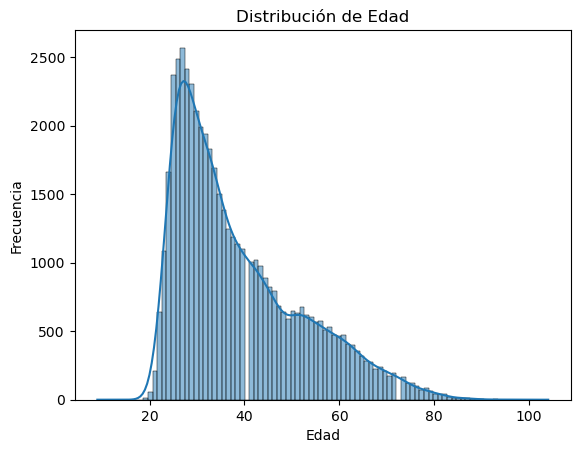

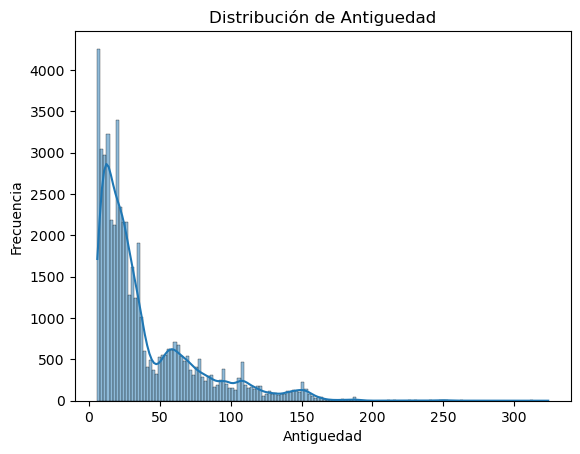

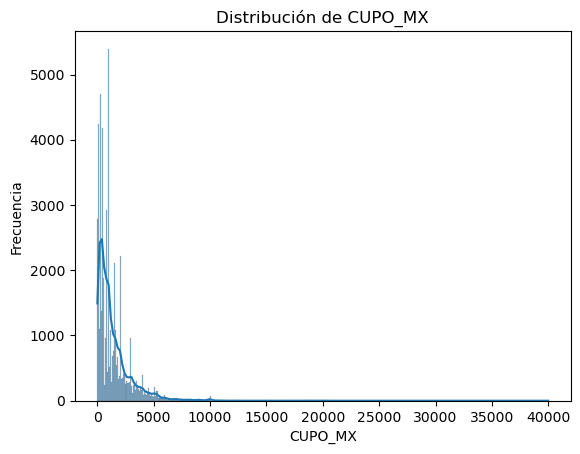

In [27]:
for col in ['Edad','Antiguedad','CUPO_MX']:
    sns.histplot(DFIni[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Los graficos son un histograma los cuales representan la frecuencia de las variables como la frcuencia de edad de los clientes,la antiguedad y la frecuencia del cupo que tienen los clientes


## Filtrado de datos

In [28]:
z = np.abs(stats.zscore(DFIni, nan_policy='omit'))  # matriz misma forma que DFIni

# 2) Creamos un filtro de filas “válidas”: todas las columnas con |z| < 3
mask_valid = (z < 2).all(axis=1)

# 3) Aplicamos el filtro
DFinal = DFIni[mask_valid].copy()

print("Forma original:", DFIni.shape)
print("Forma filtrada (Z-score):", DFinal.shape)

Forma original: (51124, 20)
Forma filtrada (Z-score): (28716, 20)


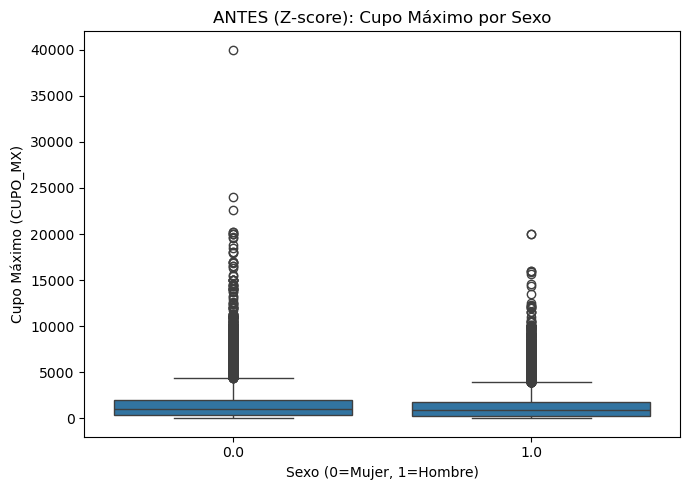

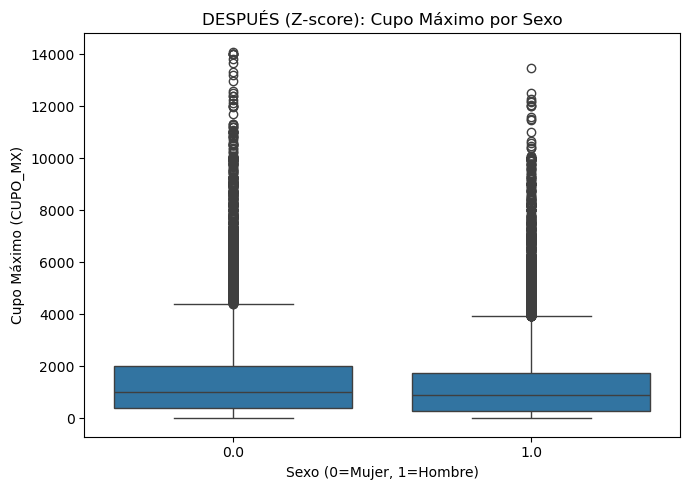

In [29]:
def boxplot_3cols(df, cols, title):
    if len(cols) != 2:
        raise ValueError("Debes pasar exactamente 2 columnas en 'cols'.")
    for c in cols:
        if c not in df.columns:
            raise KeyError(f"La columna '{c}' no existe en el DataFrame.")
    plt.figure(figsize=(7, 5))
    # Boxplot agrupado por sexo
    sns.boxplot(x=cols[0], y=cols[1], data=df)
    plt.title(title)
    plt.ylabel("Cupo Máximo (CUPO_MX)")
    plt.xlabel("Sexo (0=Mujer, 1=Hombre)")
    plt.tight_layout()
    plt.show()

# 1) Define las columnas: Sexo y CUPO_MX
cols = ["Sexo", "CUPO_MX"]

# 2) Boxplot ANTES del filtrado por Z-score
boxplot_3cols(DFIni, cols, "ANTES (Z-score): Cupo Máximo por Sexo")

# 3) Boxplot DESPUÉS del filtrado por Z-score
z = np.abs(stats.zscore(DFIni[["CUPO_MX"]], nan_policy="omit"))
mask_valid = (z < 8).all(axis=1)
DFinal = DFIni[mask_valid].copy()
boxplot_3cols(DFinal, cols, "DESPUÉS (Z-score): Cupo Máximo por Sexo")

El Grafico Boxplot del cupo por sexo nos permite visualizar las diferencias de cupo maximo entre hombres y mujeres donde ogramos identificar una leve diferencia entre estos siendo que las mujeres tienen una ligera mayor cantidad de cupo

Gráfico de dispersión: Edad vs Cupo Máximo (CUPO_MX)
Sin filtrar por Z-score


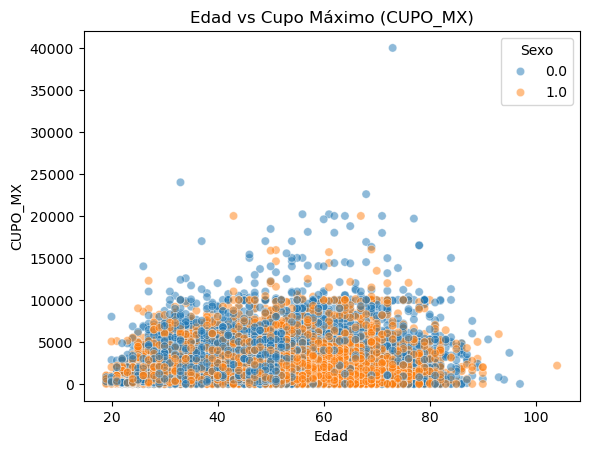

Filtrado por Z-score


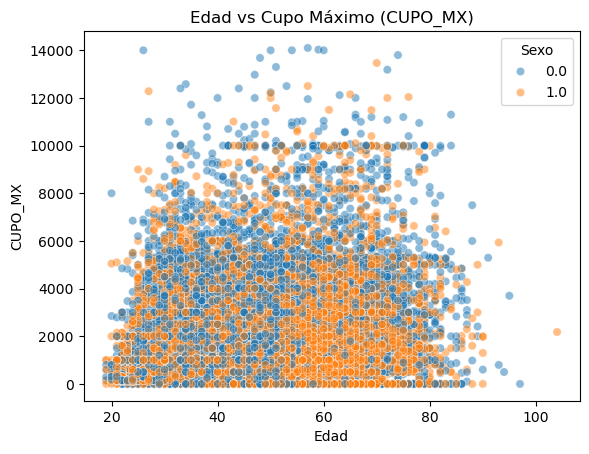

In [30]:
def plot_correlation_matrix(df):
    sns.scatterplot(x='Edad', y='CUPO_MX', hue='Sexo', data=df, alpha=0.5)
    plt.title('Edad vs Cupo Máximo (CUPO_MX)')
    plt.show()
print("Gráfico de dispersión: Edad vs Cupo Máximo (CUPO_MX)")   
print("Sin filtrar por Z-score")
plot_correlation_matrix(DFIni)

print("Filtrado por Z-score")
plot_correlation_matrix(DFinal)

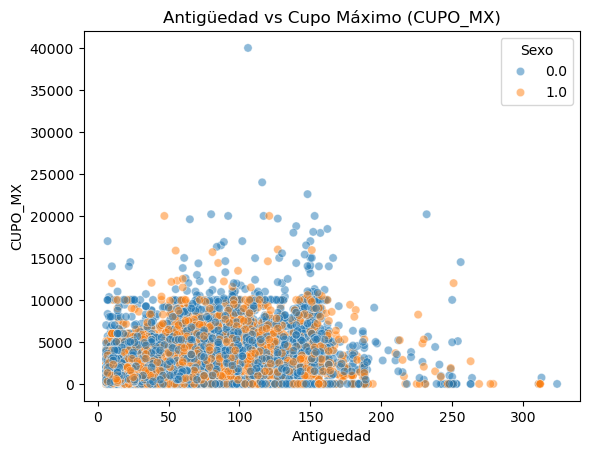

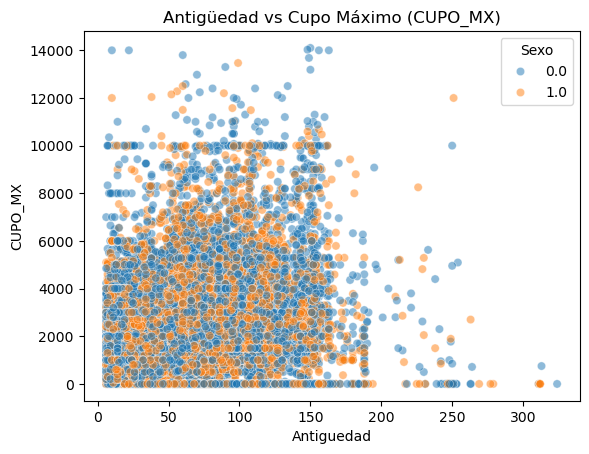

In [31]:
def plot_correlation_matrix(df):
    sns.scatterplot(x='Antiguedad', y='CUPO_MX', hue='Sexo', data=df, alpha=0.5)
    plt.title('Antigüedad vs Cupo Máximo (CUPO_MX)')
    plt.show()

plot_correlation_matrix(DFIni)
plot_correlation_matrix(DFinal)


## Correlaciones entre Edad, Antigüedad y CUPO_MX

In [32]:
print(DFIni[['Edad','Antiguedad','CUPO_MX']].corr())

                Edad  Antiguedad   CUPO_MX
Edad        1.000000    0.524487  0.352824
Antiguedad  0.524487    1.000000  0.402881
CUPO_MX     0.352824    0.402881  1.000000


Aqui podemos ver  la relaciones,algunos de los datos mas detacables son que edad y cupo possen una correlacion positiva moderada la cual indica que clientes de mas edad tienen algo mas de cupo mazimo al igual que la antiguedad y cupo siendo que a mayor antiguedad suele haber mas cupo maximo

## Promedio de CUPO_MX por Sexo

In [33]:
print(DFIni.groupby('Sexo')['CUPO_MX'].mean())

Sexo
0.0    1471.335502
1.0    1318.249736
Name: CUPO_MX, dtype: float64


Las mujeres tienen un prodmedio de cupos ligeramente mayor

## LIMPIEZA DE DATOS
En esta seccion se definen las variables X e y a utilizar para el modelo de regresion lineal, donde X son las variables independientes y y la variable dependiente.
- X = Sexo, Edad, Antiguedad
- y = CUPO_MX
Para luego llevar a cabo la limpieza de datos, eliminando los nulos y transformando las variables categoricas en variables numericas.

In [34]:
X = DFIni[['Sexo', 'Edad', 'Antiguedad']]
y = DFIni['CUPO_MX']


def clean_data(X, y):
    print(X.isnull().sum())
    print(y.isnull().sum())

    X = X.fillna(0)
    y = y.fillna(0)

    X = X.replace([np.inf, -np.inf], 0)
    y = y.replace([np.inf, -np.inf], 0)

    return X, y

X, y = clean_data(X, y)

Sexo          1
Edad          0
Antiguedad    0
dtype: int64
0


#### Resultados de la limpieza de datos

Como se pudo ver la variable de sexo se transformo de M y H a 0 y 1 respectivamente, la variable de edad se mantuvo como estaba, y la variable de antiguedad se mantuvo como estaba, mientras que la variable de cupo maximo se mantuvo como estaba.

Ademas se eliminaron los nulos y se reemplazaron los valores infinitos por 0, para evitar problemas en el modelo de regresión lineal.

### Regresión Lineal simple

En esta seccion se realiza una regresión lineal simple utilizando las variables X e y definidas anteriormente. Se utiliza la librería `sklearn` para crear el modelo de regresión lineal y se ajusta a los datos.

In [35]:
def linReg(X, y):
    lin_model = LinearRegression()
    lin_model.fit(X, y)
    y_pred = lin_model.predict(X)
    
    r2 = r2_score(y, y_pred)
    coef = dict(zip(X.columns, lin_model.coef_))
    intercept = lin_model.intercept_
    
    return r2, coef, intercept

linReg(X, y)

print("=== REGRESIÓN LINEAL (Sexo, Edad, Antigüedad -> CUPO_MX) ===")
r2, coef, intercept = linReg(X, y)
print("R²:", r2)
print("Coeficientes:")
print(coef)
print("Intercepto:", intercept)

=== REGRESIÓN LINEAL (Sexo, Edad, Antigüedad -> CUPO_MX) ===
R²: 0.19072927485552493
Coeficientes:
{'Sexo': np.float64(-90.06839858767651), 'Edad': np.float64(23.32608757144208), 'Antiguedad': np.float64(13.43142572440213)}
Intercepto: 16.87918522333507


---

In [36]:
# Curtosis de Edad, Antigüedad y CUPO_MX
print("Curtosis de Edad:", DFIni['Edad'].kurtosis())
print("Curtosis de Antigüedad:", DFIni['Antiguedad'].kurtosis())
print("Curtosis de CUPO_MX:", DFIni['CUPO_MX'].kurtosis())


Curtosis de Edad: 0.28601826607401026
Curtosis de Antigüedad: 3.5547180170754964
Curtosis de CUPO_MX: 21.95006276998578


In [37]:
DFIni.describe()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
count,51124.000000,51124.000000,51123.000000,51124.000000,51124.000000,5.112400e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,5.112400e+04,5.112400e+04,51124.000000
mean,25562.500000,182.024274,0.463842,10.827204,38.702879,6.384991e+05,38.896154,0.684199,0.256181,0.381347,0.063141,0.925260,0.000900,0.137548,0.875284,1.407206,1.732376,1.133187e+06,3.283759e+05,1400.320047
std,14758.371918,29.276596,0.498696,3.391872,13.302573,3.591103e+05,35.672549,0.464839,0.436527,0.485722,0.243218,0.262974,0.029983,0.344428,0.330400,0.550357,0.877470,1.076922e+06,7.578185e+05,1597.344457
min,1.000000,151.000000,0.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,12781.750000,160.000000,0.000000,9.000000,28.000000,4.552935e+05,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000e+05,1.000000e+03,300.000000
50%,25562.500000,170.000000,0.000000,13.000000,35.000000,5.265640e+05,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,8.000000e+05,1.000000e+05,1000.000000
75%,38343.250000,210.000000,1.000000,13.000000,46.000000,7.540400e+05,54.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.527000e+06,2.360292e+05,1900.000000
max,51124.000000,959.000000,1.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,12.000000,2.153400e+07,1.255000e+07,40000.000000


In [38]:
DFinal.describe()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
count,51081.000000,51081.000000,51080.000000,51081.000000,51081.000000,5.108100e+04,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,51081.000000,5.108100e+04,5.108100e+04,51081.000000
mean,25551.055950,182.036119,0.464076,10.827274,38.684658,6.379838e+05,38.829819,0.684384,0.255888,0.380983,0.063096,0.925334,0.000901,0.137546,0.875453,1.406550,1.731094,1.126601e+06,3.278694e+05,1386.609152
std,14754.929033,29.285052,0.498713,3.392063,13.289496,3.570179e+05,35.587759,0.464765,0.436363,0.485633,0.243138,0.262854,0.029996,0.344426,0.330208,0.549617,0.875449,1.045075e+06,7.573652e+05,1521.625554
min,1.000000,151.000000,0.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,12775.000000,160.000000,0.000000,9.000000,28.000000,4.552170e+05,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000e+05,1.000000e+03,300.000000
50%,25546.000000,170.000000,0.000000,13.000000,35.000000,5.264460e+05,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,8.000000e+05,1.000000e+05,1000.000000
75%,38316.000000,210.000000,1.000000,13.000000,46.000000,7.536960e+05,54.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.523200e+06,2.310015e+05,1900.000000
max,51124.000000,959.000000,1.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,12.000000,1.380000e+07,1.255000e+07,14100.000000


In [39]:
# ...existing code...
from sklearn.impute import KNNImputer

# Selecciona las columnas numéricas relevantes para imputar
cols_impute = ['Edad', 'Antiguedad', 'CUPO_MX']

# Aplica KNNImputer (puedes ajustar n_neighbors y weights según tu análisis)
imputer = KNNImputer(n_neighbors=4, weights='distance')
DFIni[cols_impute] = imputer.fit_transform(DFIni[cols_impute])

# Verifica que ya no hay nulos
print(DFIni[cols_impute].isnull().sum())
# ...existing code...

Edad          0
Antiguedad    0
CUPO_MX       0
dtype: int64


In [40]:
# otros

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(DFIni[['Edad','Antiguedad','CUPO_MX']]))

boston_df = DFIni[['Edad','Antiguedad','CUPO_MX']]

DFIni.shape




(51124, 20)

In [ ]:
def run_regressions(df_model, features, test_size=0.2, random_state=42):
    """
    Ejecuta 2 regresiones:
      - CUPO_MX: LinearRegression + RandomForestRegressor
      - Fac_T12: RandomForestRegressor (si existe)
    Retorna un dict con métricas y modelos.
    """
    results = {}
    if not features:
        raise RuntimeError("No se encontraron features válidas en df_model.")
    X_base = df_model[features].fillna(0)

    if 'CUPO_MX' in df_model.columns:
        y = df_model['CUPO_MX'].fillna(0)
        X_tr, X_te, y_tr, y_te = train_test_split(X_base, y, test_size=test_size, random_state=random_state)
        lr = LinearRegression().fit(X_tr, y_tr)
        y_pred = lr.predict(X_te)
        results['CUPO_MX_linear'] = {
            'model': lr,
            'r2': r2_score(y_te, y_pred),
            'mse': mean_squared_error(y_te, y_pred)
        }
        rf = RandomForestRegressor(n_estimators=100, random_state=random_state).fit(X_tr, y_tr)
        y_pred_rf = rf.predict(X_te)
        results['CUPO_MX_rf'] = {
            'model': rf,
            'r2': r2_score(y_te, y_pred_rf),
            'mse': mean_squared_error(y_te, y_pred_rf)
        }
        print("CUPO_MX -> Linear R2: {:.4f} MSE: {:.4f} | RF R2: {:.4f} MSE: {:.4f}".format(
            results['CUPO_MX_linear']['r2'], results['CUPO_MX_linear']['mse'],
            results['CUPO_MX_rf']['r2'], results['CUPO_MX_rf']['mse']
        ))
    else:
        print("CUPO_MX no disponible -> salto regresión 1")

    if 'Fac_T12' in df_model.columns:
        y = df_model['Fac_T12'].fillna(0)
        X_tr, X_te, y_tr, y_te = train_test_split(X_base, y, test_size=test_size, random_state=random_state)
        rf2 = RandomForestRegressor(n_estimators=100, random_state=random_state).fit(X_tr, y_tr)
        y_pred2 = rf2.predict(X_te)
        results['Fac_T12_rf'] = {
            'model': rf2,
            'r2': r2_score(y_te, y_pred2),
            'mse': mean_squared_error(y_te, y_pred2)
        }
        print("Fac_T12 -> RF R2: {:.4f} MSE: {:.4f}".format(results['Fac_T12_rf']['r2'], results['Fac_T12_rf']['mse']))
    else:
        print("Fac_T12 no disponible -> salto regresión 2")

    return results

df_model = DFinal.copy() if 'DFinal' in globals() else DFIni.copy()
features = [c for c in ['Sexo','Edad','Antiguedad','Renta','Region'] if c in df_model.columns]
reg_results = run_regressions(df_model, features)

CUPO_MX -> Linear R2: 0.2248 MSE: 1779489.0847 | RF R2: 0.1884 MSE: 1862902.5898
Fac_T12 no disponible -> salto regresión 2


In [ ]:
def run_classifications(df_model, features, classifiers=None, test_size=0.2, random_state=42):
    """
    Crea 4 targets binarios (si están las columnas) y evalúa 4 clasificadores.
    Retorna dict con métricas por target y por clasificador.
    """
    if classifiers is None:
        classifiers = {
            'LogisticRegression': LogisticRegression(max_iter=300),
            'KNN': KNeighborsClassifier(n_neighbors=5),
            'DecisionTree': DecisionTreeClassifier(random_state=random_state),
            'RandomForest': RandomForestClassifier(n_estimators=100, random_state=random_state)
        }

    results = {}
    targets = {}
    if 'CUPO_MX' in df_model.columns:
        targets['High_Cupo'] = (df_model['CUPO_MX'] > df_model['CUPO_MX'].median()).astype(int)
    if 'Fac_T12' in df_model.columns:
        targets['High_Facturacion'] = (df_model['Fac_T12'] > df_model['Fac_T12'].median()).astype(int)
    if 'TC' in df_model.columns:
        targets['Has_TC'] = (df_model['TC'] > 0).astype(int)
    if 'Internauta' in df_model.columns:
        targets['Internauta_flag'] = (df_model['Internauta'] == 1).astype(int)

    if not targets:
        print("No se generaron targets de clasificación (columnas ausentes).")
        return results

    X_base = df_model[features].fillna(0)

    for tname, y in targets.items():
        results[tname] = {}
        if y.nunique() < 2:
            print(f"{tname}: clase única -> salto")
            continue
        X_tr, X_te, y_tr, y_te = train_test_split(X_base, y, test_size=test_size, random_state=random_state, stratify=y)
        for cname, model in classifiers.items():
            try:
                model.fit(X_tr, y_tr)
                y_pred = model.predict(X_te)
                metrics = {
                    'accuracy': accuracy_score(y_te, y_pred),
                    'precision': precision_score(y_te, y_pred, zero_division=0),
                    'recall': recall_score(y_te, y_pred, zero_division=0),
                    'f1': f1_score(y_te, y_pred, zero_division=0)
                }
                results[tname][cname] = {'model': model, 'metrics': metrics}
                print(f"{tname} | {cname} -> Acc:{metrics['accuracy']:.3f} Prec:{metrics['precision']:.3f} Rec:{metrics['recall']:.3f} F1:{metrics['f1']:.3f}")
            except Exception as e:
                results[tname][cname] = {'error': str(e)}
                print(f"{tname} | {cname} -> error: {e}")
    return results

df_model = DFinal.copy() if 'DFinal' in globals() else DFIni.copy()
features = [c for c in ['Sexo','Edad','Antiguedad','Renta','Region'] if c in df_model.columns]
clf_results = run_classifications(df_model, features)

C:\Users\diego\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


High_Cupo | LogisticRegression -> Acc:0.700 Prec:0.685 Rec:0.494 F1:0.574
High_Cupo | KNN -> Acc:0.656 Prec:0.587 Rec:0.544 F1:0.565
High_Cupo | DecisionTree -> Acc:0.646 Prec:0.569 Rec:0.562 F1:0.565
High_Cupo | RandomForest -> Acc:0.702 Prec:0.644 Rec:0.610 F1:0.627
Has_TC: clase única -> salto
Internauta_flag | LogisticRegression -> Acc:0.738 Prec:0.756 Rec:0.910 F1:0.826
Internauta_flag | KNN -> Acc:0.666 Prec:0.717 Rec:0.846 F1:0.776
Internauta_flag | DecisionTree -> Acc:0.643 Prec:0.741 Rec:0.734 F1:0.738
Internauta_flag | RandomForest -> Acc:0.707 Prec:0.758 Rec:0.839 F1:0.797


# Variable objetivo

La variable objetivo es el cupo maximo (CUPO_MX) debido a que es la variable que queremos predecir y analizar en base a las demas variables independientes (Sexo, Edad, Antiguedad).

El cupo maximo es una variable continua que representa el limite de credito que tiene un cliente en su tarjeta de credito. Es una variable importante para el banco ya que permite evaluar el riesgo crediticio de los clientes y tomar decisiones sobre la asignacion de creditos y limites de gasto.

- **Variables Predictoras**: Sexo, Edad, Antigüedad, Renta, Region
- **Variable Objetivo**: CUPO_MX (continua)

busacar cada una con el cupo macimo y si da mas das de 0,6 es valida0

In [42]:
#modelo de regracion simple y multiple
